 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [159]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [160]:
resources_path = Path().resolve() / 'Resources'
whale_path = resources_path /'whale_returns.csv'
algo_path = resources_path /'algo_returns.csv'
sp_tsx_path = resources_path /'sp_tsx_history.csv'

In [161]:
# Reading whale returns
whale_returns = pd.read_csv(whale_path)

In [162]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [163]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [164]:
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [165]:
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [166]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_path)

In [167]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [168]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [169]:
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [170]:
# Reading S&P TSX 60 Closing Prices
snp_tsx_60 = pd.read_csv(sp_tsx_path)

In [171]:
# Check Data Types
snp_tsx_60.dtypes

Date     object
Close    object
dtype: object

In [172]:
# Fix Data Types
snp_tsx_60[['Unit', 'Close']] = snp_tsx_60.Close.str.split("$", expand=True)

In [173]:
snp_tsx_60[['First', 'Second']] = snp_tsx_60.Close.str.split(",", expand=True)

In [174]:
snp_tsx_60[['Close_Fixed']] = snp_tsx_60['First'] + snp_tsx_60['Second']

In [175]:
snp_tsx_60['Close_Fixed'] = snp_tsx_60['Close_Fixed'].astype(float)

In [176]:
snp_tsx_60.drop(columns=['Close','First','Second','Unit'], inplace=True)

In [177]:
snp_tsx_60.rename(columns={'Close_Fixed':'Close'}, inplace=True)

In [178]:
snp_tsx_60.dtypes

Date      object
Close    float64
dtype: object

In [179]:
# Calculate Daily Returns
snp_tsx_60['S&P_TSX']= snp_tsx_60['Close'].pct_change()
snp_tsx_60.head()

,Date,Close,S&P_TSX
0,1-Oct-2012,12370.19,NaN
1,2-Oct-2012,12391.23,0.001701
2,3-Oct-2012,12359.47,-0.002563
3,4-Oct-2012,12447.68,0.007137
4,5-Oct-2012,12418.99,-0.002305


In [180]:
# Drop nulls
snp_tsx_60.fillna(0, inplace=True)

In [181]:
# Rename `Close` Column to be specific to this portfolio.
snp_tsx_60.set_index(pd.to_datetime(snp_tsx_60['Date'], infer_datetime_format=True), inplace=True)
snp_tsx_60.drop(columns=['Date','Close'], inplace=True)
snp_tsx_60.head()

,S&P_TSX
Date,
2012-10-01,0.000000
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [182]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, snp_tsx_60], axis=0, join='outer')

In [183]:
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,0.003188
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,0.000600
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,0.003003


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

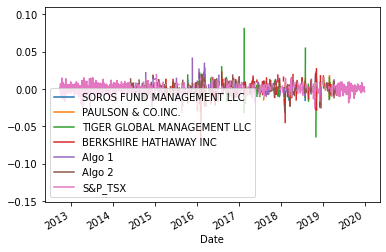

In [184]:
# Plot daily returns of all portfolios
combined_returns.plot()

#### Calculate and Plot cumulative returns.

In [223]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,NaN,NaN,NaN
2015-03-05,0.004981,0.002314,-0.000681,0.004327,NaN,NaN,NaN
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,NaN,NaN,NaN
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,0.383846
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,0.384676
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,0.388835


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

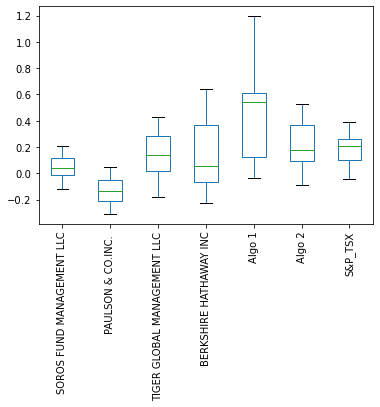

In [196]:
# Box plot to visually show risk
cumulative_returns.boxplot(grid=False, rot=90, fontsize=10)

### Calculate Standard Deviations

In [224]:
# Calculate the daily standard deviations of all portfolios
combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
S&P_TSX                        0.006636
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [225]:
# Calculate  the daily standard deviation of S&P TSX 60
snp_std = combined_returns['S&P_TSX'].std()
# Determine which portfolios are riskier than the S&P TSX 60
risk_dict = {}
for x in list(combined_returns.columns):
    risk_dict[x] = combined_returns[x].std()
riskier_than_snp = []
for y in list(risk_dict.keys()):
    if risk_dict[y] > risk_dict['S&P_TSX']:
        riskier_than_snp.append(y)

print(snp_std)
print(riskier_than_snp) 

0.00663553750499095
['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2']


### Calculate the Annualized Standard Deviation

In [226]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns*np.sqrt(252)
annualized_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,NaN,NaN,NaN
2015-03-04,0.035399,0.051454,-0.040226,0.066880,NaN,NaN,NaN
2015-03-05,0.063752,0.064705,0.037379,0.106777,NaN,NaN,NaN
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,NaN,NaN,NaN
2015-03-09,0.009243,0.067076,0.092751,-0.026232,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,0.050608
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,0.009524
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,0.047673


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

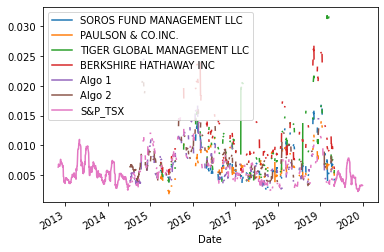

In [227]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21_day.plot()

### Calculate and plot the correlation

In [229]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,NaN,NaN,NaN
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,1.000000,0.346568,NaN
Algo 2,NaN,NaN,NaN,NaN,0.346568,1.000000,NaN
S&P_TSX,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

/Users/hasnainraza/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

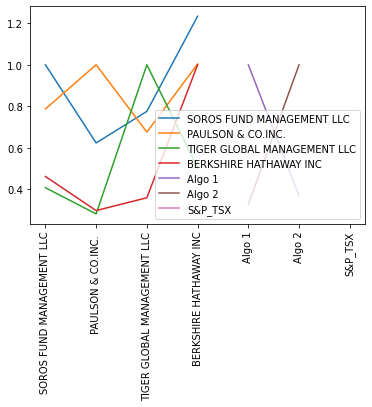

In [236]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['S&P_TSX'])
# Calculate variance of S&P TSX
snp_variance = combined_returns['S&P_TSX'].var()
# Computing beta
combined_beta = combined_returns.cov()/combined_returns.var()
# Plot beta trend
combined_beta.plot(rot=90, fontsize=10)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [247]:
# Use `ewm` to calculate the rolling window
combined_returns.std().ewm(halflife=21)

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!